In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import cross_val_score


In [2]:

# Load the dataset (replace with your actual data path)
# load in datasets
df_2020 = pd.read_csv('2020.csv')
df_2021 = pd.read_csv('2021.csv')
df_2022 = pd.read_csv('2022.csv')
df_2023 = pd.read_csv('2023.csv')
df_2024 = pd.read_csv('2024.csv')
data = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024], axis=0)
# data

# Check for missing values
print(data.isnull().sum())

YEAR                 0
QUARTER              0
MONTH                0
AIRLINE_ID           0
UNIQUE_CARRIER       0
CARRIER              0
CARRIER_NAME         0
CARRIER_GROUP_NEW    0
SALA_GALLONS         5
SDOMT_GALLONS        2
SATL_GALLONS         2
SPAC_GALLONS         2
SLAT_GALLONS         2
SINT_GALLONS         2
TS_GALLONS           2
NALA_GALLONS         8
NDOM_GALLONS         2
NDOMT_GALLONS        2
NATL_GALLONS         2
NPAC_GALLONS         2
NLAT_GALLONS         3
MAC_GALLONS          7
NINT_GALLONS         2
TN_GALLONS           3
TDOMT_GALLONS        2
TINT_GALLONS         2
TOTAL_GALLONS        3
SALA_COST            4
SDOM_COST            2
SDOMT_COST           2
SATL_COST            2
SPAC_COST            2
SLAT_COST            2
SINT_COST            2
TS_COST              2
NALA_COST            8
NDOM_COST            2
NDOMT_COST           2
NATL_COST            2
NPAC_COST            2
NLAT_COST            2
MAC_COST             3
NINT_COST            2
TN_COST    

In [3]:
# Drop rows with missing target values (TOTAL_GALLONS, TOTAL_COST)
data = data.dropna(subset=['TOTAL_GALLONS', 'TOTAL_COST'])

# Label encode categorical columns like 'UNIQUE_CARRIER' and 'CARRIER'
label_encoder = LabelEncoder()
data['UNIQUE_CARRIER'] = label_encoder.fit_transform(data['UNIQUE_CARRIER'])
data['CARRIER'] = label_encoder.fit_transform(data['CARRIER'])

# One-hot encode other categorical columns (e.g., 'CARRIER_NAME', 'YEAR', 'QUARTER', 'MONTH')
data_encoded = pd.get_dummies(data, columns=['CARRIER_NAME', 'YEAR', 'QUARTER', 'MONTH'], drop_first=True)

# Features and target variables
features = data_encoded.drop(columns=['TOTAL_GALLONS', 'TOTAL_COST'])
target_gallons = data_encoded['TOTAL_GALLONS']
target_cost = data_encoded['TOTAL_COST']



In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train_gallons, y_test_gallons = train_test_split(features, target_gallons, test_size=0.3, random_state=42)
X_train_cost, X_test_cost, y_train_cost, y_test_cost = train_test_split(features, target_cost, test_size=0.3, random_state=42)



In [11]:
# Initialize XGBoost models
model_gallons = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, learning_rate=0.05,max_depth=3,subsample=.8,colsample_bylevel=1.0)
model_cost = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, learning_rate=0.05,max_depth=3,subsample=.8,colsample_bylevel=1.0)
cv_scores = cross_val_score(model_gallons, features, target_gallons, cv=5, scoring='r2')
cv_scores

array([0.60536366, 0.6105002 , 0.64463307, 0.61594116, 0.59109128])

In [6]:
# from sklearn.model_selection import GridSearchCV
# 
# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 500, 1000],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }
# 
# # Initialize the XGBoost model
# model_gallons = xgb.XGBRegressor(objective='reg:squarederror')
# 
# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=model_gallons, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train_gallons)
# 
# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)
# 
# # Train the model with the best parameters
# model_gallons = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
# model_gallons.fit(X_train, y_train_gallons)
# 
# # Make predictions
# y_pred_gallons = model_gallons.predict(X_test)
# 
# # Calculate metrics
# mae_gallons = mean_absolute_error(y_test_gallons, y_pred_gallons)
# mse_gallons = mean_squared_error(y_test_gallons, y_pred_gallons)
# r2_gallons = r2_score(y_test_gallons, y_pred_gallons)
# 
# # Print the evaluation results
# print(f"Gallons Prediction - MAE: {mae_gallons}, MSE: {mse_gallons}, R^2: {r2_gallons}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.8}
Gallons Prediction - MAE: 437009.2348823291, MSE: 1242488951880.798, R^2: 0.9996962690575509


In [12]:
# Train the models
model_gallons.fit(X_train, y_train_gallons)
model_cost.fit(X_train_cost, y_train_cost)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=1.0, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10,
             n_jobs=None, num_parallel_tree=None, ...)

In [13]:
# Make predictions
y_pred_gallons = model_gallons.predict(X_test)
y_pred_cost = model_cost.predict(X_test_cost)
# Print the first few predicted values for TOTAL_GALLONS
print("Predicted TOTAL_GALLONS:", y_pred_gallons[:5])

# Print the first few predicted values for TOTAL_COST
print("Predicted TOTAL_COST:", y_pred_cost[:5])


Predicted TOTAL_GALLONS: [5.0781288e+07 1.7253092e+07 4.3846852e+07 1.3402262e+08 1.6544047e+07]
Predicted TOTAL_COST: [1.4224205e+08 4.5271512e+07 1.3891282e+08 3.8980739e+08 4.2393464e+07]


In [14]:
# Calculate metrics for the 'TOTAL_GALLONS' model
mae_gallons = mean_absolute_error(y_test_gallons, y_pred_gallons)
mse_gallons = mean_squared_error(y_test_gallons, y_pred_gallons)
r2_gallons = r2_score(y_test_gallons, y_pred_gallons)

# Calculate metrics for the 'TOTAL_COST' model
mae_cost = mean_absolute_error(y_test_cost, y_pred_cost)
mse_cost = mean_squared_error(y_test_cost, y_pred_cost)
r2_cost = r2_score(y_test_cost, y_pred_cost)

# Print the evaluation results
print(f"Gallons Prediction - MAE: {mae_gallons}, MSE: {mse_gallons}, R^2: {r2_gallons}")
print(f"Cost Prediction - MAE: {mae_cost}, MSE: {mse_cost}, R^2: {r2_cost}")

Gallons Prediction - MAE: 23704888.77069351, MSE: 1557271479002710.0, R^2: 0.6193193241271362
Cost Prediction - MAE: 61508330.307606265, MSE: 1.2155660382683952e+16, R^2: 0.6108012812218581


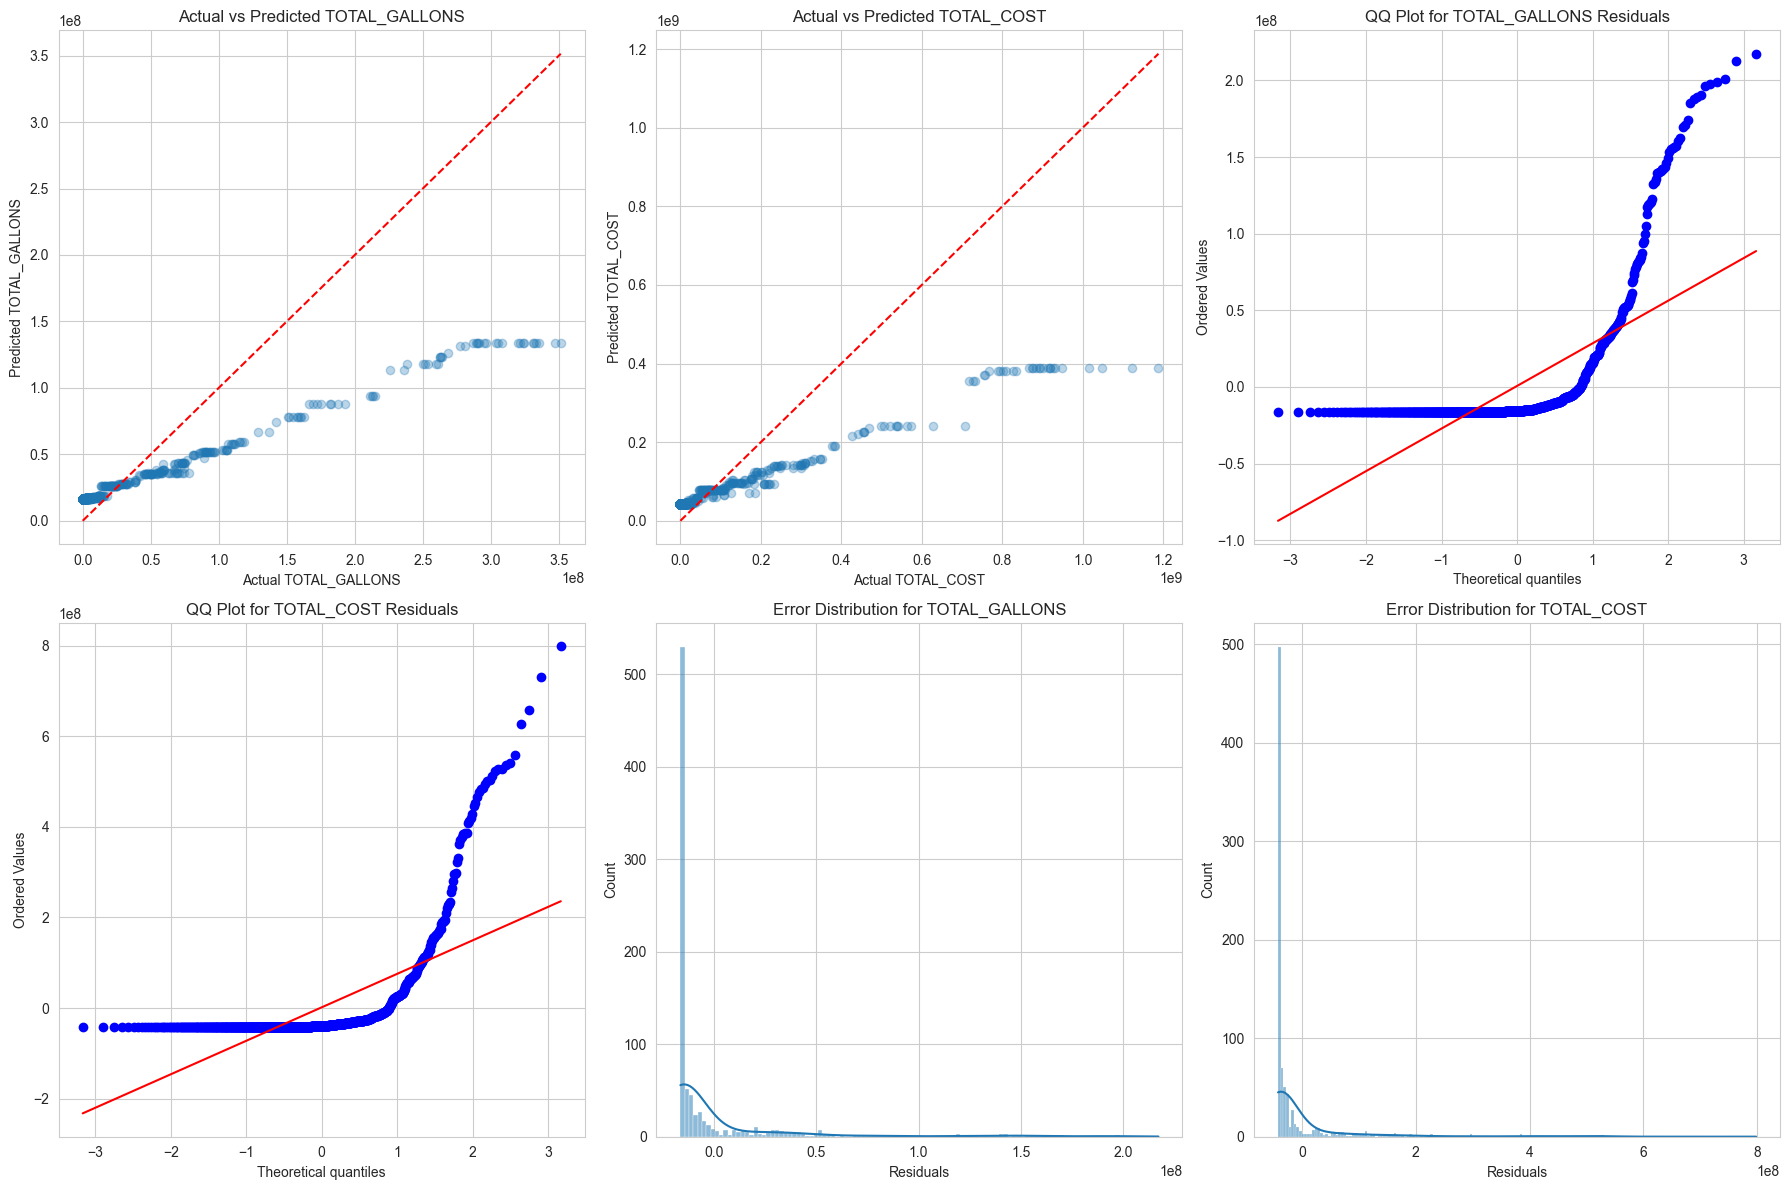

In [15]:
# Plotting the results
plt.figure(figsize=(18, 12))

# Plot for TOTAL_GALLONS
plt.subplot(2, 3, 1)
plt.scatter(y_test_gallons, y_pred_gallons, alpha=0.3)
plt.plot([y_test_gallons.min(), y_test_gallons.max()], [y_test_gallons.min(), y_test_gallons.max()], 'r--')
plt.xlabel('Actual TOTA_GALLONS')
plt.ylabel('Predicted TOTAL_GALLONS')
plt.title('Actual vs Predicted TOTAL_GALLONS')

# Plot for TOTAL_COST
plt.subplot(2, 3, 2)
plt.scatter(y_test_cost, y_pred_cost, alpha=0.3)
plt.plot([y_test_cost.min(), y_test_cost.max()], [y_test_cost.min(), y_test_cost.max()], 'r--')
plt.xlabel('Actual TOTAL_COST')
plt.ylabel('Predicted TOTAL_COST')
plt.title('Actual vs Predicted TOTAL_COST')

# QQ plot for TOTAL_GALLONS
plt.subplot(2, 3, 3)
stats.probplot(y_test_gallons - y_pred_gallons, dist="norm", plot=plt)
plt.title('QQ Plot for TOTAL_GALLONS Residuals')

# QQ plot for TOTAL_COST
plt.subplot(2, 3, 4)
stats.probplot(y_test_cost - y_pred_cost, dist="norm", plot=plt)
plt.title('QQ Plot for TOTAL_COST Residuals')

# Error distribution for TOTAL_GALLONS
plt.subplot(2, 3, 5)
sns.histplot(y_test_gallons - y_pred_gallons, kde=True)
plt.xlabel('Residuals')
plt.title('Error Distribution for TOTAL_GALLONS')

# Error distribution for TOTAL_COST
plt.subplot(2, 3, 6)
sns.histplot(y_test_cost - y_pred_cost, kde=True)
plt.xlabel('Residuals')
plt.title('Error Distribution for TOTAL_COST')

plt.tight_layout()
plt.show()